In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

data = datasets.load_linnerud()

In [2]:
data

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [3]:
df_data = pd.DataFrame(data.data, columns = data.feature_names)
df_labels = pd.DataFrame(data.target, columns = data.target_names)

In [5]:
data = pd.concat([df_data, df_labels.Pulse], axis=1)

In [6]:
data

,Chins,Situps,Jumps,Pulse
0,5.0,162.0,60.0,50.0
1,2.0,110.0,60.0,52.0
2,12.0,101.0,101.0,58.0
3,12.0,105.0,37.0,62.0
4,13.0,155.0,58.0,46.0
5,4.0,101.0,42.0,56.0
6,8.0,101.0,38.0,56.0
7,6.0,125.0,40.0,60.0
8,15.0,200.0,40.0,74.0
9,17.0,251.0,250.0,56.0


In [10]:
from sklearn.model_selection import train_test_split

X=data.loc[:, ['Chins', 'Situps', 'Jumps']]
y=data.loc[:, 'Pulse']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (3,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               400       
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 15)                465       
                                                                 
 dense_9 (Dense)             (None, 1)                 16        
                                                                 
Total params: 7,461
Trainable params: 7,461
Non-trainable params: 0
_________________________________________________________________


In [17]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3375.6843 - mse: 3375.6843 - val_loss: 3068.0811 - val_mse: 3068.0811
Epoch 2/100
1/1 [==============================] - 0s 56ms/step - loss: 2696.3818 - mse: 2696.3818 - val_loss: 2489.2039 - val_mse: 2489.2039
Epoch 3/100
1/1 [==============================] - 0s 57ms/step - loss: 2153.3472 - mse: 2153.3472 - val_loss: 2011.4200 - val_mse: 2011.4200
Epoch 4/100
1/1 [==============================] - 0s 64ms/step - loss: 1685.2433 - mse: 1685.2433 - val_loss: 1694.0635 - val_mse: 1694.0635
Epoch 5/100
1/1 [==============================] - 0s 62ms/step - loss: 1352.5515 - mse: 1352.5515 - val_loss: 1466.4646 - val_mse: 1466.4646
Epoch 6/100
1/1 [==============================] - 0s 64ms/step - loss: 1103.1942 - mse: 1103.1942 - val_loss: 1296.3429 - val_mse: 1296.3429
Epoch 7/100
1/1 [==============================] - 0s 61ms/step - loss: 896.9740 - mse: 896.9740 - val_loss: 1174.2742 - val_mse: 1174.2742
Epoch 8/10

1/1 [==============================] - 0s 62ms/step - loss: 329.6825 - mse: 329.6825 - val_loss: 1705.3370 - val_mse: 1705.3370
Epoch 60/100
1/1 [==============================] - 0s 61ms/step - loss: 328.9815 - mse: 328.9815 - val_loss: 2025.3696 - val_mse: 2025.3696
Epoch 61/100
1/1 [==============================] - 0s 63ms/step - loss: 329.4899 - mse: 329.4899 - val_loss: 1757.2863 - val_mse: 1757.2863
Epoch 62/100
1/1 [==============================] - 0s 61ms/step - loss: 332.0115 - mse: 332.0115 - val_loss: 2164.2920 - val_mse: 2164.2920
Epoch 63/100
1/1 [==============================] - 0s 64ms/step - loss: 332.0573 - mse: 332.0573 - val_loss: 1721.6017 - val_mse: 1721.6017
Epoch 64/100
1/1 [==============================] - 0s 65ms/step - loss: 333.7613 - mse: 333.7613 - val_loss: 2147.2573 - val_mse: 2147.2573
Epoch 65/100
1/1 [==============================] - 0s 63ms/step - loss: 331.2116 - mse: 331.2116 - val_loss: 1819.5441 - val_mse: 1819.5441
Epoch 66/100
1/1 [========

In [18]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 57ms/step - loss: 2408.4465 - mse: 2408.4465


[2408.446533203125, 2408.446533203125]

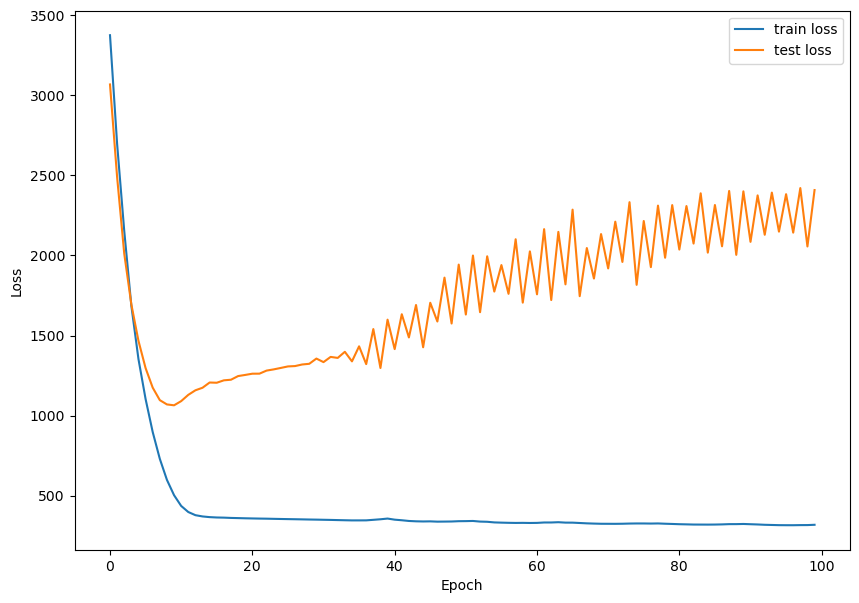

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

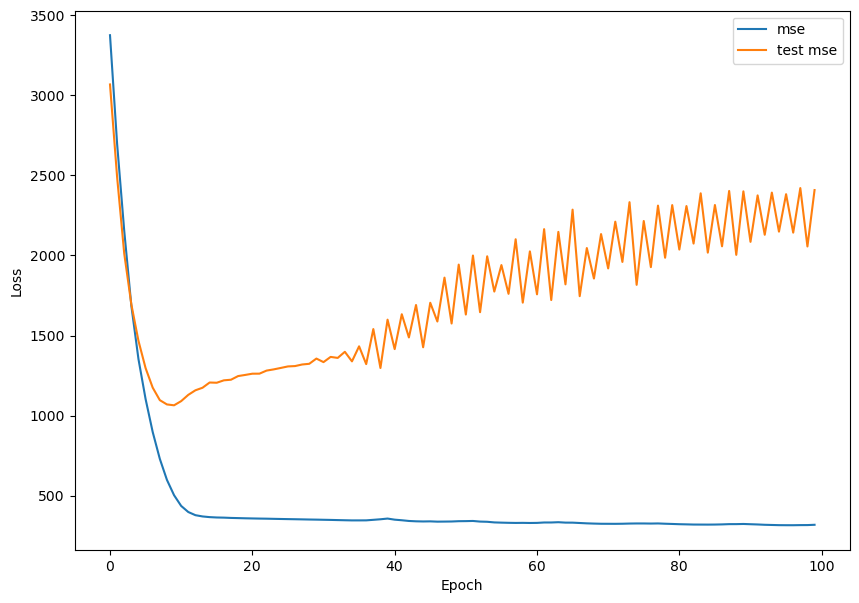

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()